In [22]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for displaying DataFrames

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


print('done1')

done1


In [2]:
data = pd.read_csv("sales_data.csv",encoding = "ISO-8859-1")
dates = pd.read_csv("date.csv",encoding = "ISO-8859-1")
# Display the first five records
display(data.head(n=5))
print(data.shape)

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,01-12-2010,Wednesday,1,December,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,01-12-2010,Wednesday,1,December,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,01-12-2010,Wednesday,1,December,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,01-12-2010,Wednesday,1,December,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,01-12-2010,Wednesday,1,December,08:26:00


(541909, 13)


In [3]:
data.isnull().any()

transaction id           False
product id               False
product description       True
quantity sold            False
transaction timestamp    False
unit price               False
customer id               True
transaction country      False
date                     False
day_name                 False
day_of_month             False
month_of_year            False
time_of_day(hh:mm:ss)    False
dtype: bool

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 13 columns):
transaction id           541909 non-null object
product id               541909 non-null object
product description      540455 non-null object
quantity sold            541909 non-null int64
transaction timestamp    541909 non-null object
unit price               541909 non-null float64
customer id              406829 non-null float64
transaction country      541909 non-null object
date                     541909 non-null object
day_name                 541909 non-null object
day_of_month             541909 non-null int64
month_of_year            541909 non-null object
time_of_day(hh:mm:ss)    541909 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 53.7+ MB


In [5]:
data.describe()


,quantity sold,unit price,customer id,day_of_month
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,15.023096
std,218.081158,96.759853,1713.600303,8.664063
min,-80995.000000,-11062.060000,12346.000000,1.000000
25%,1.000000,1.250000,13953.000000,7.000000
50%,3.000000,2.080000,15152.000000,15.000000
75%,10.000000,4.130000,16791.000000,22.000000
max,80995.000000,38970.000000,18287.000000,31.000000


# cheching the number of negative unit prices

In [6]:
data1 = data.loc[data['unit price'] < 0 ]
display(data1.head())
print(data1.shape)

,transaction id,product id,product description,quantity sold,transaction timestamp,unit price,customer id,transaction country,date,day_name,day_of_month,month_of_year,time_of_day(hh:mm:ss)
299983,A563186,B,Adjust bad debt,1,12-08-2011 14:51,-11062.06,NaN,United Kingdom,12-08-2011,Friday,12,August,14:51:00
299984,A563187,B,Adjust bad debt,1,12-08-2011 14:52,-11062.06,NaN,United Kingdom,12-08-2011,Friday,12,August,14:52:00


(2, 13)


as there are only two such entries, we can discard them.

In [7]:
final_data = data[data['unit price'] >= 0]
print(final_data.shape)

(541907, 13)


In [8]:
final_data.isnull().sum()

transaction id                0
product id                    0
product description        1454
quantity sold                 0
transaction timestamp         0
unit price                    0
customer id              135078
transaction country           0
date                          0
day_name                      0
day_of_month                  0
month_of_year                 0
time_of_day(hh:mm:ss)         0
dtype: int64

# checking the percentage of null values for customer id

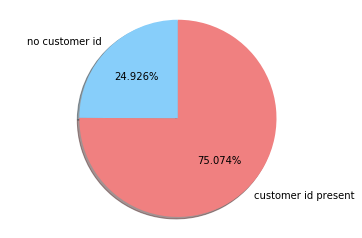

In [9]:
labels = 'no customer id','customer id present'
sizes = [135078,541907-135078]
colors = ['lightskyblue', 'lightcoral']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.3f%%',
        shadow=True, startangle=90,colors = colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

as customer id is an important feature. only 75% of the data is useful, hence we drop 25% of the data.

In [16]:
final_data.dropna(axis = 0, subset = ['customer id'], inplace = True)
print(final_data.shape)
print(final_data.isnull().sum())

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



(401604, 13)
transaction id           0
product id               0
product description      0
quantity sold            0
transaction timestamp    0
unit price               0
customer id              0
transaction country      0
date                     0
day_name                 0
day_of_month             0
month_of_year            0
time_of_day(hh:mm:ss)    0
dtype: int64


In [17]:
print('duplicate entries: {}'.format(final_data.duplicated().sum()))
final_data.drop_duplicates(inplace = True)

duplicate entries: 0


C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\util\decorators.py:91: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [18]:
print(final_data.shape)

(401604, 13)


In [19]:
data1 = final_data.loc[final_data['quantity sold'] < 0 ]
data2 = final_data.loc[final_data['quantity sold'] >= 0 ]
print(data1.shape[0]+data2.shape[0])


401604


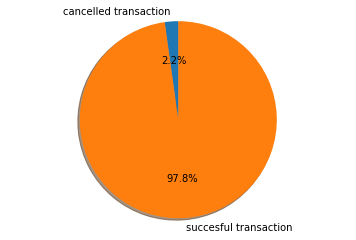

In [20]:
labels = 'cancelled transaction','succesful transaction'
sizes = [data1.shape[0],data2.shape[0]]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [23]:
def scatter_plot(var, color):
    trace = go.Scatter(
        x=var.index[::-1],
        y=var.values[::-1],
        showlegend=False,
        marker=dict(
            color=color,
        ),
    )
    return trace


var = final_data.groupby('date')['quantity sold'].agg(['size', 'count'])
var.columns = ["total count", "non-zero revenue count"]
var = var.sort_index()
#cnt_srs.index = cnt_srs.index.astype('str')
trace1 = scatter_plot(var["total count"], 'grey')
trace2 = scatter_plot(var["non-zero revenue count"], 'orange')

fig = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.08,
                          subplot_titles=["Date - total Count", "Date - Non-zero Revenue count"])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig['layout'].update(height=800, width=800, title="plot of date against revenue counts")
py.iplot(fig, filename='date vs revenue counts')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]

